In [1]:
from sklearn.datasets import make_multilabel_classification
import bls3
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from skmultilearn.dataset import load_dataset,load_from_arff
from skmultilearn.dataset import available_data_sets
from sklearn.metrics import accuracy_score,hamming_loss,f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import seed
from random import randrange,random
from csv import reader
import bagging1
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.adapt import MLkNN,MLTSVM,MLARAM
import timeit
import copy

D:\anaconda3\envs\openne\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
set([x[0] for x in available_data_sets().keys()])

{'Corel5k',
 'bibtex',
 'birds',
 'delicious',
 'emotions',
 'enron',
 'genbase',
 'mediamill',
 'medical',
 'rcv1subset1',
 'rcv1subset2',
 'rcv1subset3',
 'rcv1subset4',
 'rcv1subset5',
 'scene',
 'tmc2007_500',
 'yeast'}

In [3]:
X_train, y_train, feature_names, label_names = load_dataset('birds', 'train')
X_test, y_test, _, _ = load_dataset('birds', 'test')
X=np.vstack([X_train.toarray(),X_test.toarray()])
y=np.vstack([y_train.toarray(),y_test.toarray()])

birds:train - exists, not redownloading
birds:test - exists, not redownloading


In [4]:
bls = bls3.broadnet(maptimes = 10,
               enhencetimes = 10,
               map_function = 'sigmoid',
               enhence_function = 'sigmoid',
               batchsize = 'auto',
               reg = 0.001)

In [5]:
bagging_net=bagging1.bagging_net(10,bls,False)

In [6]:
kNN = MLkNN()
ARAM=MLARAM()
RFC=RandomForestClassifier()
dtc=DecisionTreeClassifier()

In [7]:
model=[dtc,RFC,bls,bagging_net,kNN,ARAM]

In [8]:
#num用于控制循环的次数
num=20
accuracy_total=[[]for i in range(len(model))]
hamming_total=[[]for i in range(len(model))]
f1_micro_total=[[]for i in range(len(model))]
f1_macro_total=[[]for i in range(len(model))]
time_total=[[]for i in range(len(model))]

In [9]:
for j in range(num):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    for i in range(len(model)):
        start = timeit.default_timer()
        classifier=copy.deepcopy(model[i])
        classifier.fit(X_train,y_train)
        end = timeit.default_timer()
        prediction=classifier.predict(X_test)
        accuracy_total[i].append(accuracy_score(y_pred=prediction,y_true=y_test))
        hamming_total[i].append(hamming_loss(y_pred=prediction,y_true=y_test))
        f1_micro_total[i].append(f1_score(y_pred=prediction,y_true=y_test,average='micro'))
        f1_macro_total[i].append(f1_score(y_pred=prediction,y_true=y_test,average='macro'))
        time_total[i].append(end-start)

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97434 minvalue 0.02551 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95047 minvalue 0.0273 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96123 minvalue 0.02542 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97536 minvalue 0.03875 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97386 minvalue 0.0244 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97012 minvalue 0.03147 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence 

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.973 minvalue 0.02294 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96648 minvalue 0.02855 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97884 minvalue 0.02542 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97278 minvalue 0.02187 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96741 minvalue 0.02894 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97835 minvalue 0.01925 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence 

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97666 minvalue 0.02463 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98094 minvalue 0.03962 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98385 minvalue 0.04112 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97334 minvalue 0.02597 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95855 minvalue 0.01598 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97895 minvalue 0.02417 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhenc

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97506 minvalue 0.03181 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97628 minvalue 0.02906 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9849 minvalue 0.04092 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9723 minvalue 0.02325 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97492 minvalue 0.03525 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96462 minvalue 0.03298 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence 

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.99001 minvalue 0.0224 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98695 minvalue 0.02679 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97455 minvalue 0.02232 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97616 minvalue 0.03065 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97277 minvalue 0.01953 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96805 minvalue 0.03044 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97673 minvalue 0.0301 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96914 minvalue 0.02686 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97644 minvalue 0.0319 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98059 minvalue 0.02662 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97489 minvalue 0.02718 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97214 minvalue 0.01923 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence 

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97032 minvalue 0.03893 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9629 minvalue 0.02713 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98062 minvalue 0.02552 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97094 minvalue 0.02452 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96939 minvalue 0.03521 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96641 minvalue 0.0239 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence 

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97516 minvalue 0.02637 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97273 minvalue 0.03099 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96514 minvalue 0.02111 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97791 minvalue 0.02489 


D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97721 minvalue 0.02633 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97151 minvalue 0.02657 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96598 minvalue 0.02867 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97707 minvalue 0.03039 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96391 minvalue 0.04958 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97943 minvalue 0.03381 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhenc

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97709 minvalue 0.02953 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96704 minvalue 0.021 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97079 minvalue 0.02259 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97013 minvalue 0.01996 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97879 minvalue 0.02079 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9836 minvalue 0.02195 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence n

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95578 minvalue 0.02583 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9693 minvalue 0.02621 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97417 minvalue 0.02183 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97103 minvalue 0.02193 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97469 minvalue 0.026 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98105 minvalue 0.03029 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence n

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97777 minvalue 0.02178 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96741 minvalue 0.02092 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97647 minvalue 0.03379 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97375 minvalue 0.03236 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97107 minvalue 0.01883 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96889 minvalue 0.02551 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhenc

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98875 minvalue 0.02876 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97431 minvalue 0.02473 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97339 minvalue 0.02453 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98064 minvalue 0.02001 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97813 minvalue 0.03273 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96403 minvalue 0.02946 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhenc

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97161 minvalue 0.03557 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97813 minvalue 0.03415 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97702 minvalue 0.02279 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97528 minvalue 0.0216 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97184 minvalue 0.02026 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97226 minvalue 0.02122 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98406 minvalue 0.02778 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97057 minvalue 0.02913 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97227 minvalue 0.02326 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96976 minvalue 0.02273 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96705 minvalue 0.02701 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97274 minvalue 0.02509 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhenc

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97335 minvalue 0.03324 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98002 minvalue 0.02667 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96738 minvalue 0.02488 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96763 minvalue 0.02026 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9772 minvalue 0.02702 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97864 minvalue 0.02858 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97518 minvalue 0.02981 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96678 minvalue 0.02411 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97117 minvalue 0.03362 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9676 minvalue 0.03499 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97014 minvalue 0.03545 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97711 minvalue 0.03406 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97862 minvalue 0.02484 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97692 minvalue 0.03975 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97191 minvalue 0.02404 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97267 minvalue 0.02112 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98537 minvalue 0.03334 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9801 minvalue 0.02824 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9748 minvalue 0.0353 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97943 minvalue 0.02715 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97637 minvalue 0.02834 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97878 minvalue 0.02542 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97314 minvalue 0.03654 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95981 minvalue 0.03091 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence 

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97689 minvalue 0.02375 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97827 minvalue 0.03719 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96663 minvalue 0.02285 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97175 minvalue 0.02689 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97395 minvalue 0.02737 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95931 minvalue 0.0234 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence

E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97606 minvalue 0.0263 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96998 minvalue 0.02147 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94712 minvalue 0.02446 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97244 minvalue 0.02847 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.94922 minvalue 0.03143 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97126 minvalue 0.01906 
number of mapping nodes 2600, number of enhence nodes 2600
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence

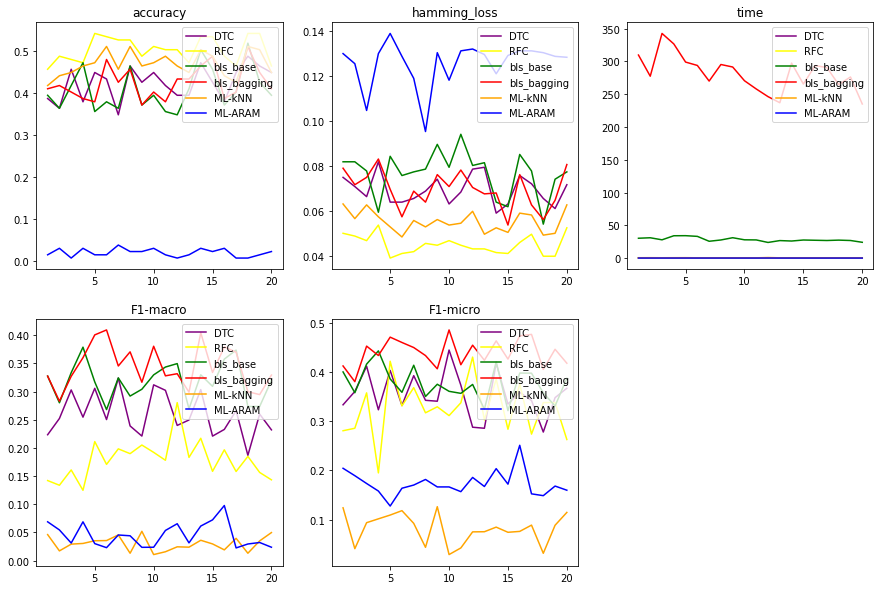

In [10]:
plt.figure(1,figsize=(15,10))
plt.subplot(2,3,1)
plt.title("accuracy")
plt.plot(range(1,num+1),accuracy_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),accuracy_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),accuracy_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),accuracy_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),accuracy_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),accuracy_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,2)
plt.title("hamming_loss")
plt.plot(range(1,num+1),hamming_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),hamming_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),hamming_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),hamming_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),hamming_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),hamming_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,3)
plt.title("time")
plt.plot(range(1,num+1),time_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),time_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),time_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),time_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),time_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),time_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,4)
plt.title("F1-macro")
plt.plot(range(1,num+1),f1_macro_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),f1_macro_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),f1_macro_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),f1_macro_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),f1_macro_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),f1_macro_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,5)
plt.title("F1-micro")
plt.plot(range(1,num+1),f1_micro_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),f1_micro_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),f1_micro_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),f1_micro_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),f1_micro_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),f1_micro_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.show()

In [11]:
score=[[]for i in range(5)]
for i in range(len(model)):
    print('the accuracy score of model{0}'.format(i+1),np.mean(accuracy_total[i]))
    score[0].append(np.mean(accuracy_total[i]))
    print('the hamming loss of model{0}'.format(i+1),np.mean(hamming_total[i]))
    score[1].append(np.mean(hamming_total[i]))
    print('the time of model{0}'.format(i+1),np.mean(time_total[i]))
    score[2].append(np.mean(time_total[i]))
    print('the F1 macro score of model{0}'.format(i+1),np.mean(f1_macro_total[i]))
    score[3].append(np.mean(f1_macro_total[i]))
    print('the F1 micro score of model{0}'.format(i+1),np.mean(f1_micro_total[i]))
    score[4].append(np.mean(f1_micro_total[i]))
    print('\n')

the accuracy score of model1 0.42519379844961247
the hamming loss of model1 0.06954304365565075
the time of model1 0.18370547499995588
the F1 macro score of model1 0.2590016354790182
the F1 micro score of model1 0.35378759956854183


the accuracy score of model2 0.5042635658914729
the hamming loss of model2 0.04512443900448796
the time of model2 0.09287147499995053
the F1 macro score of model2 0.17933173498908447
the F1 micro score of model2 0.32625304497150764


the accuracy score of model3 0.40891472868217055
the hamming loss of model3 0.0769481844145247
the time of model3 28.3249596999999
the F1 macro score of model3 0.3177743825398941
the F1 micro score of model3 0.37642317811723525


the accuracy score of model4 0.42519379844961247
the hamming loss of model4 0.06982864137086903
the time of model4 281.956827845
the F1 macro score of model4 0.34454497421157976
the F1 micro score of model4 0.43913060280363725


the accuracy score of model5 0.46976744186046504
the hamming loss of mode

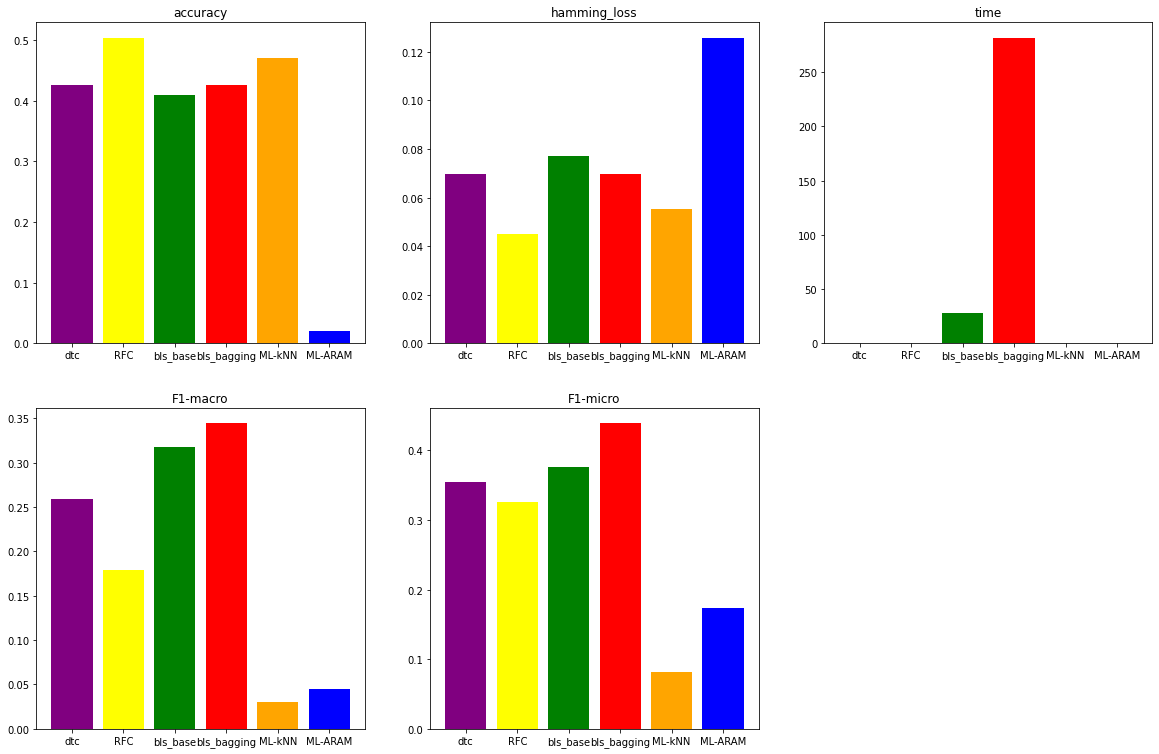

In [13]:
model_name=['dtc','RFC','bls_base','bls_bagging','ML-kNN','ML-ARAM']
plt.figure(1,figsize=(20,13))
plt.subplot(2,3,1)
plt.title("accuracy")
plt.bar(model_name,score[0],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,2)
plt.title("hamming_loss")
plt.bar(model_name,score[1],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,3)
plt.title("time")
plt.bar(model_name,score[2],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,4)
plt.title("F1-macro")
plt.bar(model_name,score[3],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,5)
plt.title("F1-micro")
plt.bar(model_name,score[4],color=['purple','yellow','green','red','orange','blue'])
plt.show()